In [5]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import std

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.dpi'] = 100   
plt.rcParams['savefig.dpi'] = 100

# Import the data

In [6]:
white_wine_df = pd.read_csv('winequality-white.csv',sep=';')
red_wine_df = pd.read_csv('winequality-red.csv',sep=';')

In [7]:
white_wine_df.info()
red_wine_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

In [8]:
# Create a copy of the dataframes

w_wine = white_wine_df.copy()
r_wine = red_wine_df.copy()


In [9]:
w_wine.info()
r_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

In [10]:
# print the number of duplicates in the datasets

print('Number of duplicates in white wine dataset: ', w_wine.duplicated().sum())
print('Number of duplicates in red wine dataset: ', r_wine.duplicated().sum())

Number of duplicates in white wine dataset:  937
Number of duplicates in red wine dataset:  240


In [11]:
# Remove duplicates from the datasets

w_wine = w_wine.drop_duplicates(keep = 'first')
r_wine = r_wine.drop_duplicates(keep = 'first')

In [12]:
# Create a new column 'wine_type' and add it to the datasets

w_wine['wine_type'] = 'white'
r_wine['wine_type'] = 'red'

display(w_wine.head())
display(r_wine.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [13]:
# Combine the datasets

wines = pd.concat([w_wine, r_wine])
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


In [17]:
from sklearn.preprocessing import LabelEncoder

# label encode the wine_type column
labelencoder = LabelEncoder()
wines['wine_type'] = labelencoder.fit_transform(wines['wine_type'])

# print the first 5 rows of the combined datasets
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,1


In [ ]:
# Predict wine type using a funciton that takes in the split data and runs it through various models

def predict_wine_type(X_train, X_test, y_train, y_test):
        
        # Create a list of the models to be used
        models = []
        models.append(('Logistic Regression', LogisticRegression()))
        models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
        models.append(('KNeighbors Classifier', KNeighborsClassifier()))
        models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
        models.append(('SGD Classifier', SGDClassifier()))
        models.append(('Random Forest Classifier', RandomForestClassifier()))
        models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
        models.append(('Linear SVC', LinearSVC()))
        models.append(('Gaussian NB', GaussianNB()))
        models.append(('SVC', SVC()))
        
        # Evaluate each model in turn
        results = []
        names = []
        for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            results.append(acc)
            names.append(name)
            msg = "%s: %f" % (name, acc)
            print(msg)        

        # Plot the accuracy results of the models using seaborn boxplots
        fig = plt.figure(figsize=(12, 6))
        fig.suptitle('Algorithm Comparison')
        ax = fig.add_subplot(111)
        sns.boxplot(x=names, y=results)
        ax.set_xticklabels(names, rotation=90)

        plt.show()

        # Evaluate the models using a confusion matrix, mean squared error, mean absolute error, mean squared log error, and r2 score

        for name, model in models:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(name)
            print(confusion_matrix(y_test, y_pred))
            print(classification_report(y_test, y_pred))
            print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
            print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
            print('Mean Squared Log Error: ', mean_squared_log_error(y_test, y_pred))
            print('R2 Score: ', r2_score(y_test, y_pred))
            
            print('------------------------------------------------------')
            


        
        

In [ ]:
# Drop the quality column from the dataset
wines = wines.drop('quality', axis = 1)

display(wines.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1


In [ ]:
# Split the data into train and test sets

X = wines.drop('wine_type', axis = 1)
y = wines['wine_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
display(X.head())
display(y.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


0    1
1    1
2    1
3    1
6    1
Name: wine_type, dtype: int64

Logistic Regression: 0.977444
Linear Discriminant Analysis: 0.994987
KNeighbors Classifier: 0.939850
Decision Tree Classifier: 0.979950
SGD Classifier: 0.949248
Random Forest Classifier: 0.991228
Gradient Boosting Classifier: 0.991855
Linear SVC: 0.982456
Gaussian NB: 0.970551
SVC: 0.936717


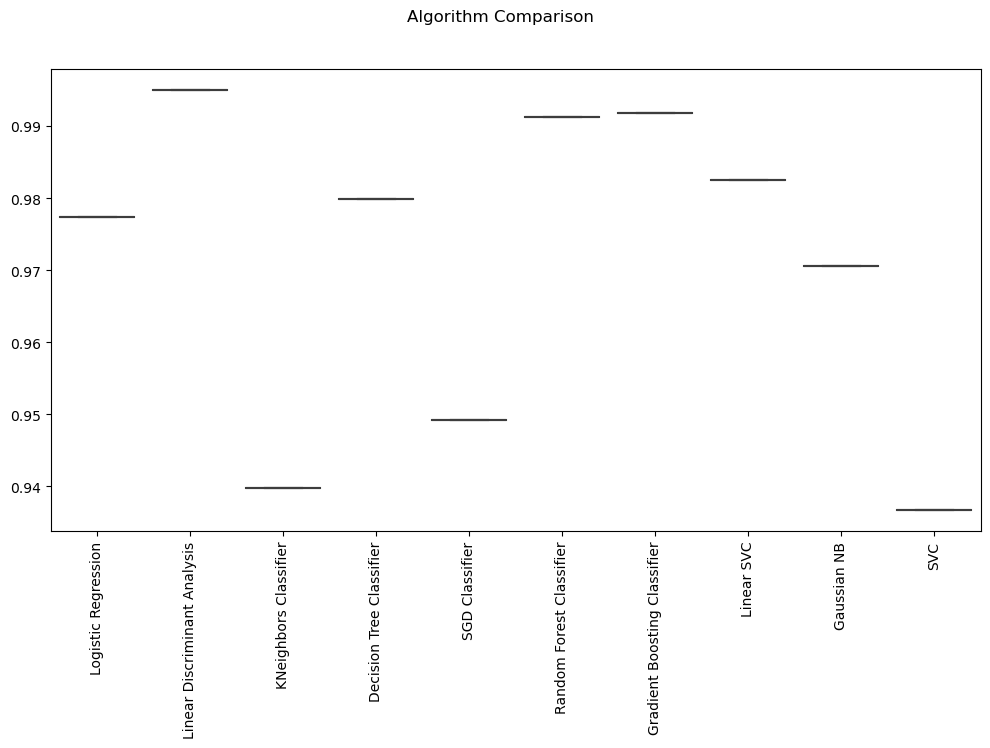

Logistic Regression
[[ 380   22]
 [  14 1180]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       402
           1       0.98      0.99      0.98      1194

    accuracy                           0.98      1596
   macro avg       0.97      0.97      0.97      1596
weighted avg       0.98      0.98      0.98      1596

Mean Squared Error:  0.022556390977443608
Mean Absolute Error:  0.022556390977443608
Mean Squared Log Error:  0.010837286028230107
R2 Score:  0.8802970074251857
------------------------------------------------------
Linear Discriminant Analysis
[[ 396    6]
 [   2 1192]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       402
           1       0.99      1.00      1.00      1194

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596

Mean Squared Error:  0.0050

In [ ]:
# Run the predict_wine_type function on the split data

predict_wine_type(X_train, X_test, y_train, y_test)
